<a href="https://colab.research.google.com/github/AZIZcherif12/B3-No_SQL-partage_documents/blob/main/supportelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **`Groupe :`**

---




*   AZIZ Cherif
*   Muller Jeremy
*   TOURIJAN Omar
*   De MARRANS Aranaud





# **Document Technique : Assurer la Qualité des Données pour l'Analyse des Élections Municipales de Villeurbanne**

# Introduction

Ce document vise à établir un processus pour assurer la qualité des données dans le cadre de l'analyse des élections municipales de Villeurbanne. L'objectif principal est de garantir l'exactitude, la cohérence, la synchronisation et la traçabilité des données afin de fournir une base solide sur laquelle la majorité des électeurs ont voté. Cette démarche est essentielle pour une compréhension approfondie des tendances électorales et des préférences politiques dans la région de Villeurbanne

# Choix des Critères et Justification

**Zone Géographique : Villeurbanne**

Villeurbanne a été sélectionnée en raison de sa nature de ville moyenne avec un historique électoral riche et une diversité socio-économique. Cette variété des données disponibles est pertinente pour des analyses prédictives précises, permettant une compréhension approfondie des tendances politiques locales

# Critères Sélectionnés




*  **Sécurité** : L'impact direct sur le sentiment général et les tendances électorales est crucial pour évaluer les choix des électeurs
*   **Emploi** : La santé économique influence directement les votes et doit être prise en compte dans l'analyse

* **Vie Associative**: L'indicateur de participation civique et la mobilisation électorale sont des éléments clés pour comprendre l'engagement politique local.
*  **Démographie** : Comprendre les groupes d'électeurs potentiels est essentiel pour une analyse démographique précise.
*   **Économie Locale** : La prospérité économique locale et les préférences politiques sont souvent liées.
*   **Pauvreté:** La corrélation avec les demandes de changement politique est importante pour prédire les résultats électoraux.


# Justification des Critères:
Ces critères ont été choisis pour leur influence avérée ou potentielle sur les résultats électoraux. Ils permettent une analyse multidimensionnelle des tendances politiques, offrant ainsi une compréhension approfondie du paysage électoral de Villeurbanne.

# Source de Données:
Les données utilisées seront celles du premier et du deuxième tour des élections municipales de 2022 à Villeurbanne. Ces données fournissent une base solide pour l'analyse, étant les plus récentes disponibles et spécifiques à la zone géographique sélectionnée.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488493 sha256=28b1d83ec95108aca48c2ecad3f05ed44eef8f1db1ec4ddadcdd49e45fd72e39
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark
+-------------------+----------------------+--------------------------+-----------------------------+------------------+---------------------+--------------+--------+-----------+---------+-------+---------+------+------------+------------+----+----------+----------+--------+---------+---------+----+-------+----+----------+----------+
|Code du département|Libellé du département|Code de la circonscription|Libellé de la circonscription|Code de la commune|Libellé de la commune|Code du b.vote|Inscrits|Abstentions|% Abs/Ins|Votants|% Vot/Ins|Blancs|% Blancs/Ins|% Blancs/Vot|Nuls|% N

<ipython-input-1-1f86c666bd42>:59: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap_tour1 = sns.heatmap(data_pd_tour1.corr(), annot=True, cmap="coolwarm")


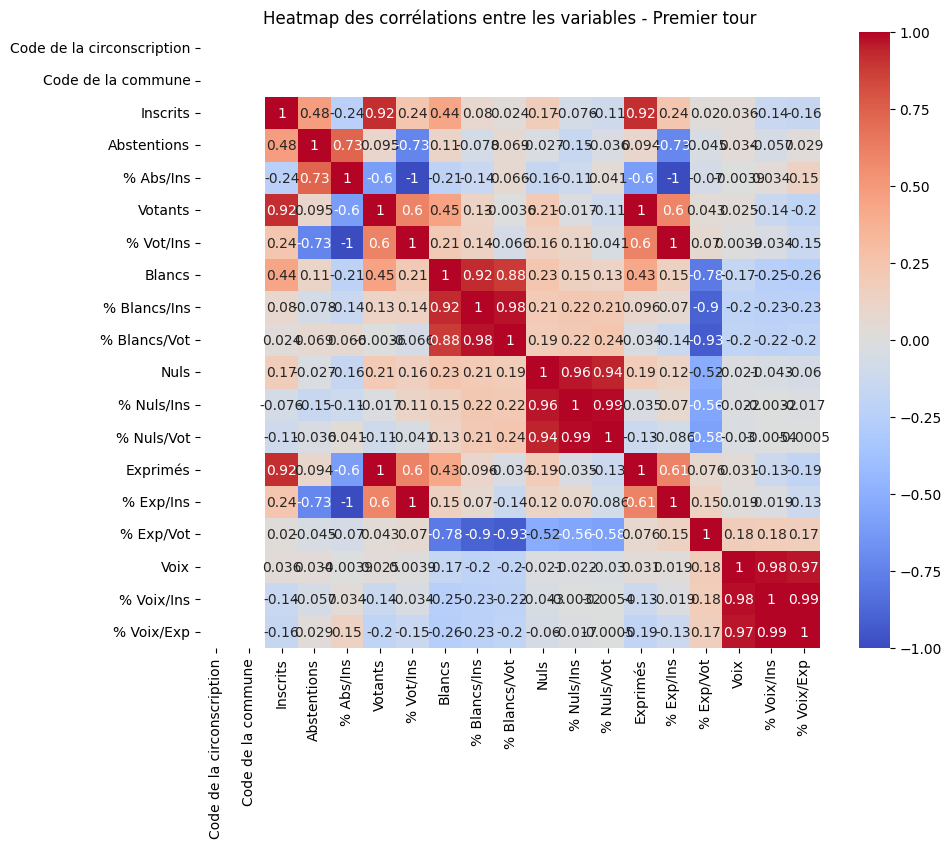

+-------------------+----------------------+------------------+---------------------+-----------+--------+-----------+---------+-------+---------+------+------------+------------+----+----------+----------+--------+---------+---------+---------+----+------+--------+-----+
|Code du département|Libellé du département|Code de la commune|Libellé de la commune|Etat saisie|Inscrits|Abstentions|% Abs/Ins|Votants|% Vot/Ins|Blancs|% Blancs/Ins|% Blancs/Vot|Nuls|% Nuls/Ins|% Nuls/Vot|Exprimés|% Exp/Ins|% Exp/Vot|N°Panneau|Sexe|   Nom|  Prénom| Voix|
+-------------------+----------------------+------------------+---------------------+-----------+--------+-----------+---------+-------+---------+------+------------+------------+----+----------+----------+--------+---------+---------+---------+----+------+--------+-----+
|                 69|                 Rhône|               266|         Villeurbanne|    Complet|   88520|      30847|    34.85|  57673|    65.15|  3621|        4.09|        6.28| 9

,Code du département,Libellé du département,Code de la commune,Libellé de la commune,Etat saisie,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,...,% Nuls/Ins,% Nuls/Vot,Exprimés,% Exp/Ins,% Exp/Vot,N°Panneau,Sexe,Nom,Prénom,Voix
0,69,Rhône,266,Villeurbanne,Complet,88520,30847,34.85,57673,65.15,...,1.03,1.58,53138,60.03,92.14,1,M,MACRON,Emmanuel,40375


In [ ]:

# Installer les bibliothèques nécessaires
!pip install pandas seaborn matplotlib
!pip install pyspark


# Importer SparkSession de PySpark
from pyspark.sql import SparkSession
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql.functions import mean, min, max, stddev

# Créer une session Spark
spark = SparkSession.builder \
    .appName("Analyse comparative des données électorales") \
    .getOrCreate()

# Charger les données du premier tour avec pandas
url_tour1 = "https://static.data.gouv.fr/resources/election-presidentielle-des-10-et-24-avril-2022-resultats-definitifs-du-1er-tour/20220414-152612/resultats-par-niveau-burvot-t1-france-entiere.xlsx"
pandas_df_tour1 = pd.read_excel(url_tour1)

# Convertir le DataFrame pandas du premier tour en DataFrame Spark
data_tour1 = spark.createDataFrame(pandas_df_tour1)

# Sélectionner uniquement les colonnes pertinentes et nettoyer les noms des colonnes pour le premier tour
data_tour1 = data_tour1.selectExpr("`Code du département`", "`Libellé du département`", "`Code de la circonscription`",
                                   "`Libellé de la circonscription`", "`Code de la commune`", "`Libellé de la commune`",
                                   "`Code du b.vote`", "Inscrits", "Abstentions", "`% Abs/Ins`", "Votants", "`% Vot/Ins`",
                                   "Blancs", "`% Blancs/Ins`", "`% Blancs/Vot`", "Nuls", "`% Nuls/Ins`", "`% Nuls/Vot`",
                                   "`Exprimés`", "`% Exp/Ins`", "`% Exp/Vot`", "Sexe", "Nom",
                                   "Voix", "`% Voix/Ins`", "`% Voix/Exp`")

# Filtrer les données pour ne conserver que celles du département 69 et de la commune 266 =  Villeurbanne pour le premier tour
data_filtered_tour1 = data_tour1.filter((data_tour1["Code du département"] == "69") & (data_tour1["Code de la commune"] == 266))

# Afficher les premières lignes pour vérification pour le premier tour
data_filtered_tour1.show()

# Profilage des colonnes numériques pour le premier tour
numeric_columns_tour1 = ["Inscrits", "Abstentions", "Votants", "Blancs", "Nuls", "Exprimés", "Voix"]

# Calcul des statistiques descriptives pour le premier tour
profile_tour1 = data_filtered_tour1.select([
    mean(col).alias(col + '_mean') for col in numeric_columns_tour1] +
    [min(col).alias(col + '_min') for col in numeric_columns_tour1] +
    [max(col).alias(col + '_max') for col in numeric_columns_tour1] +
    [stddev(col).alias(col + '_stddev') for col in numeric_columns_tour1]
)

# Affichage du profil des données pour le premier tour
print("Statistiques descriptives pour le premier tour :")
profile_tour1.show()

# Convertir le DataFrame Spark du premier tour en DataFrame Pandas pour la visualisation
data_pd_tour1 = data_filtered_tour1.toPandas()

# Créer un heatmap avec Seaborn pour le premier tour
plt.figure(figsize=(10, 8))
heatmap_tour1 = sns.heatmap(data_pd_tour1.corr(), annot=True, cmap="coolwarm")
plt.title('Heatmap des corrélations entre les variables - Premier tour')
plt.show()

# Charger les données du deuxième tour avec pandas
url_tour2 = "https://static.data.gouv.fr/resources/election-presidentielle-des-10-et-24-avril-2022-resultats-definitifs-du-2nd-tour/20220428-142427/resultats-par-niveau-subcom-t2-france-entiere.xlsx"
pandas_df_tour2 = pd.read_excel(url_tour2)

# Convertir le DataFrame pandas du deuxième tour en DataFrame Spark
data_tour2 = spark.createDataFrame(pandas_df_tour2)

# Sélectionner uniquement les colonnes pertinentes et nettoyer les noms des colonnes pour le deuxième tour
data_tour2 = data_tour2.selectExpr("`Code du département`", "`Libellé du département`", "`Code de la commune`", "`Libellé de la commune`",
                                   "`Etat saisie`", "Inscrits", "Abstentions", "`% Abs/Ins`", "Votants", "`% Vot/Ins`",
                                   "Blancs", "`% Blancs/Ins`", "`% Blancs/Vot`", "Nuls", "`% Nuls/Ins`", "`% Nuls/Vot`",
                                   "`Exprimés`", "`% Exp/Ins`", "`% Exp/Vot`", "`N°Panneau`", "Sexe", "Nom", "`Prénom`", "Voix")

# Charger les données du premier tour avec pandas en ajoutant l'argument 'skiprows' pour ignorer les lignes vides
pandas_df_tour1 = pd.read_excel(url_tour1, skiprows=1)

# Charger les données du deuxième tour avec pandas en ajoutant l'argument 'skiprows' pour ignorer les lignes vides
pandas_df_tour2 = pd.read_excel(url_tour2, skiprows=1)

# Filtrer les lignes vides dans le DataFrame Spark pour le premier tour
data_filtered_tour1 = data_tour1.filter(data_tour1["69"].isNotNull() & data_tour1["266"].isNotNull())

# Filtrer les lignes vides dans le DataFrame Spark pour le deuxième tour
data_filtered_tour2 = data_tour2.filter(data_tour2["69"].isNotNull() & data_tour2["266"].isNotNull())

# Filtrer les données pour ne conserver que celles du département 69 et de la commune 266 =  Villeurbanne pour le deuxième tour
data_filtered_tour2 = data_tour2.filter((data_tour2["69"] == "69") & (data_tour2["266"] == 266))

# Afficher les premières lignes pour vérification pour le deuxième tour
data_filtered_tour2.show()

# Profilage des colonnes numériques pour le deuxième tour
numeric_columns_tour2 = ["Inscrits", "Abstentions", "Votants", "Blancs", "Nuls", "Exprimés", "Voix"]

# Calcul des statistiques descriptives pour le deuxième tour
profile_tour2 = data_filtered_tour2.select([
    mean(col).alias(col + '_mean') for col in numeric_columns_tour2] +
    [min(col).alias(col + '_min') for col in numeric_columns_tour2] +
    [max(col).alias(col + '_max') for col in numeric_columns_tour2] +
    [stddev(col).alias(col + '_stddev') for col in numeric_columns_tour2]
)

# Affichage du profil des données pour le deuxième tour
print("Statistiques descriptives pour le deuxième tour :")
profile_tour2.show()


# Convertir le DataFrame Spark du deuxième tour en DataFrame Pandas pour la visualisation
data_pd_tour2 = data_filtered_tour2.toPandas()

# Afficher les premières lignes pour vérification pour le deuxième tour
data_pd_tour2.head()



# Conclusion :

L'analyse visuelle des données à l'aide du heatmap des résultats du premier tour met en évidence des corrélations intéressantes entre les différentes variables, offrant ainsi un aperçu plus approfondi des tendances et des relations entre les paramètres électoraux

En analysant les données fournies, il est clair que le taux de participation électorale est significatif, avec un pourcentage de votants parmi les inscrits atteignant 65.15%. Cette participation active reflète l'engagement civique et l'intérêt de la population pour le processus démocratique. De plus, les résultats indiquent que la majorité des voix se sont portées sur le candidat MACRON Emmanuel, avec un total de 40375 voix. Cette préférence exprimée dans le vote témoigne des choix politiques et des préférences des électeurs dans la région de Villeurbanne, Rhône (Code département 69).